In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("dataset.csv")

In [ ]:
df

,customerid,gender,age,annual income,spending score
0,1,male,19,15,39.0
1,2,male,21,15,81.0
2,3,female,20,16,6.0
3,4 female,23,16,77,NaN
4,5,female,31,17,40.0
5,7,female,35,18,6.0
6,8,female,23,18,94.0
7,9,male,64,19,3.0
8,10,female,30,19,72.0
9,11,male,67,19,14.0


In [ ]:
print(df.isnull().sum())

df['spending score'] = df['spending score'].fillna(df['spending score'].mean())

features = df[['annual income', 'spending score']]
display(features.head())

customerid        0
gender            0
age               0
annual income     0
spending score    1
dtype: int64


,annual income,spending score
0,15,39.000000
1,15,81.000000
2,16,6.000000
3,77,44.666667
4,17,40.000000


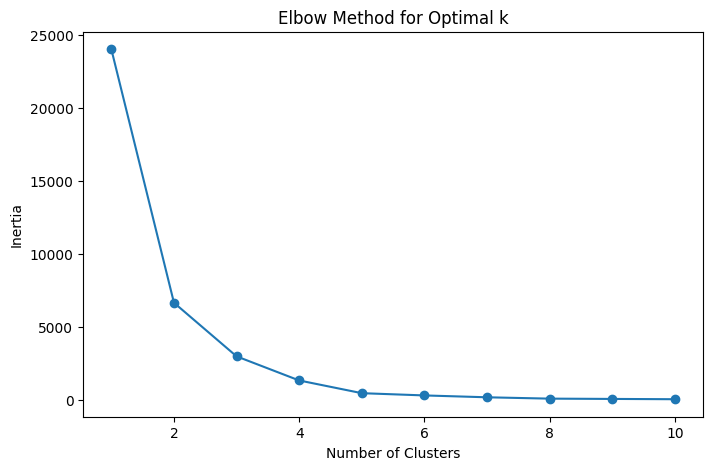

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(features)
df['cluster'] = kmeans.labels_
display(df.head())

,customerid,gender,age,annual income,spending score,cluster
0,1,male,19,15,39.000000,8
1,2,male,21,15,81.000000,1
2,3,female,20,16,6.000000,0
3,4 female,23,16,77,44.666667,3
4,5,female,31,17,40.000000,8


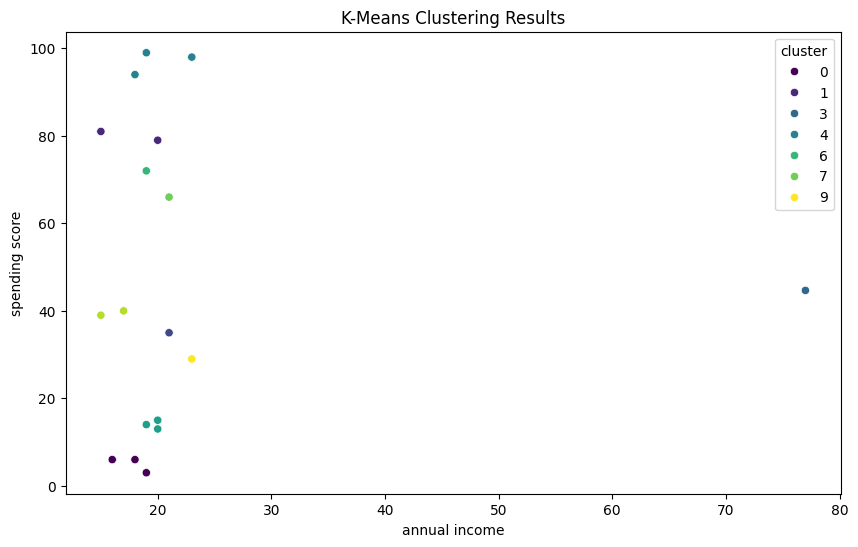

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='annual income', y='spending score', hue='cluster', palette='viridis')
plt.title('K-Means Clustering Results')
plt.show()